In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


# load csv file into memory

In [3]:
data = pandas.read_csv('C:/Users/Dell/Desktop/uber-raw-data-apr14.csv')
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


# convert datatime and add some useful column

In [5]:
data['Date/Time']= data['Date/Time'].map(pandas.to_datetime)


In [6]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [55]:
def get_dom (dt):
    return dt.day

data['dom']= data['Date/Time'].map(get_dom)

In [56]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [72]:
def get_weekday(wd):
    return wd.weekday()

w= data['Date/Time']
data['weekday']=w.map(get_weekday)

In [73]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,23,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,23,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,23,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,23,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,23,2,23


In [70]:
def get_hour (dt):
    return dt.hour
h=data['Date/Time']
data['hour']= h.map(get_hour)

In [74]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,23,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,23,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,23,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,23,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,23,2,23


# analysis

# analyze the dom


Text(0.5, 1.0, 'Frequancy by dom - uber - april 2014')

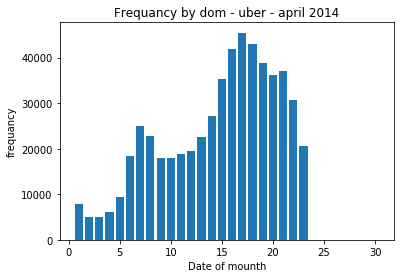

In [88]:
hist(data.dom , bins =30 , rwidth=.8 , range =(0.5 ,30.5)  )
xlabel('Date of mounth')
ylabel ('frequancy')
title ('Frequancy by dom - uber - april 2014')

In [94]:
#for k ,rows in data.groupby('dom'):
 #   print ((k,len( rows)))
    
def count_rows(rows):
    return len(rows)
by_date= data.groupby('dom').apply(count_rows)
by_date

dom
0     11910
1      7769
2      4935
3      5040
4      6095
5      9476
6     18498
7     24924
8     22843
9     17939
10    17865
11    18774
12    19425
13    22603
14    27190
15    35324
16    42003
17    45475
18    43003
19    38923
20    36244
21    36964
22    30645
23    20649
dtype: int64

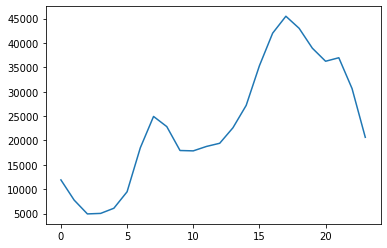

In [96]:
plot (by_date)

In [146]:
by_date_sorted= by_date.sort_values()
by_date_sorted

dom
2      4935
3      5040
4      6095
1      7769
5      9476
0     11910
10    17865
9     17939
6     18498
11    18774
12    19425
23    20649
13    22603
8     22843
7     24924
14    27190
22    30645
15    35324
20    36244
21    36964
19    38923
16    42003
18    43003
17    45475
dtype: int64

''

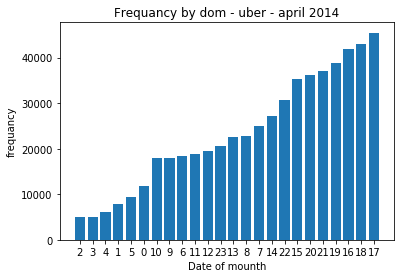

In [124]:
bar(range(1,25), by_date_sorted)
xticks(range(1,25),by_date_sorted.index)
xlabel('Date of mounth')
ylabel ('frequancy')
title ('Frequancy by dom - uber - april 2014')
;

## analyze hour


(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.52083333,  2.54166667,  3.5625    ,  4.58333333,
         5.60416667,  6.625     ,  7.64583333,  8.66666667,  9.6875    ,
        10.70833333, 11.72916667, 12.75      , 13.77083333, 14.79166667,
        15.8125    , 16.83333333, 17.85416667, 18.875     , 19.89583333,
        20.91666667, 21.9375    , 22.95833333, 23.97916667, 25.        ]),
 <a list of 24 Patch objects>)

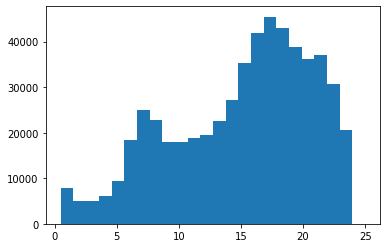

In [125]:
hist (data.hour, range=(0.5,25), bins= 24)

# analyze weekday

([<matplotlib.axis.XTick at 0x142d8a18b48>,
 <a list of 7 Text xticklabel objects>)

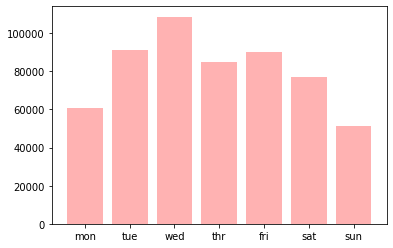

In [135]:
hist (data.weekday , range=(-.5,6.5),rwidth=.8,color='red', bins=7, alpha=.3)
xticks(range(7), 'mon tue wed thr fri sat sun'.split())


# cross analysis (hour , dom)

In [150]:
by_cross=data.groupby('weekday hour'.split()).apply(count_rows).unstack()

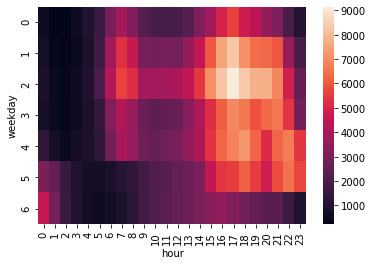

In [151]:
seaborn.heatmap(by_cross)

In [ ]:
## by lat and lon

''

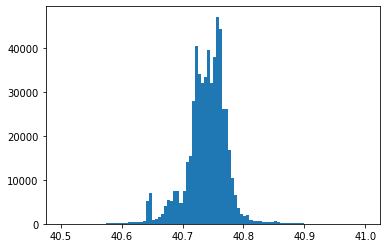

In [158]:
hist (data['Lat'], bins=100 , range=(40.5,41))
;

''

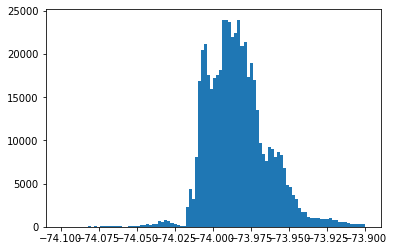

In [162]:
hist (data['Lon'], bins=100 , range=(-74.1,-73.9))
;

''

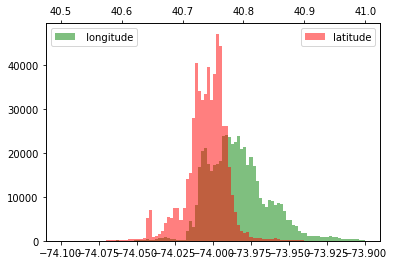

In [174]:
hist (data['Lon'], bins=100 , range=(-74.1,-73.9), color='g', alpha= 0.5,label=' longitude')
legend(loc= 'upper left')
twiny()
hist (data['Lat'], bins=100 , range=(40.5,41) , color= 'r',alpha= 0.5, label='latitude')
legend(loc='best')
;

(40.4, 41)

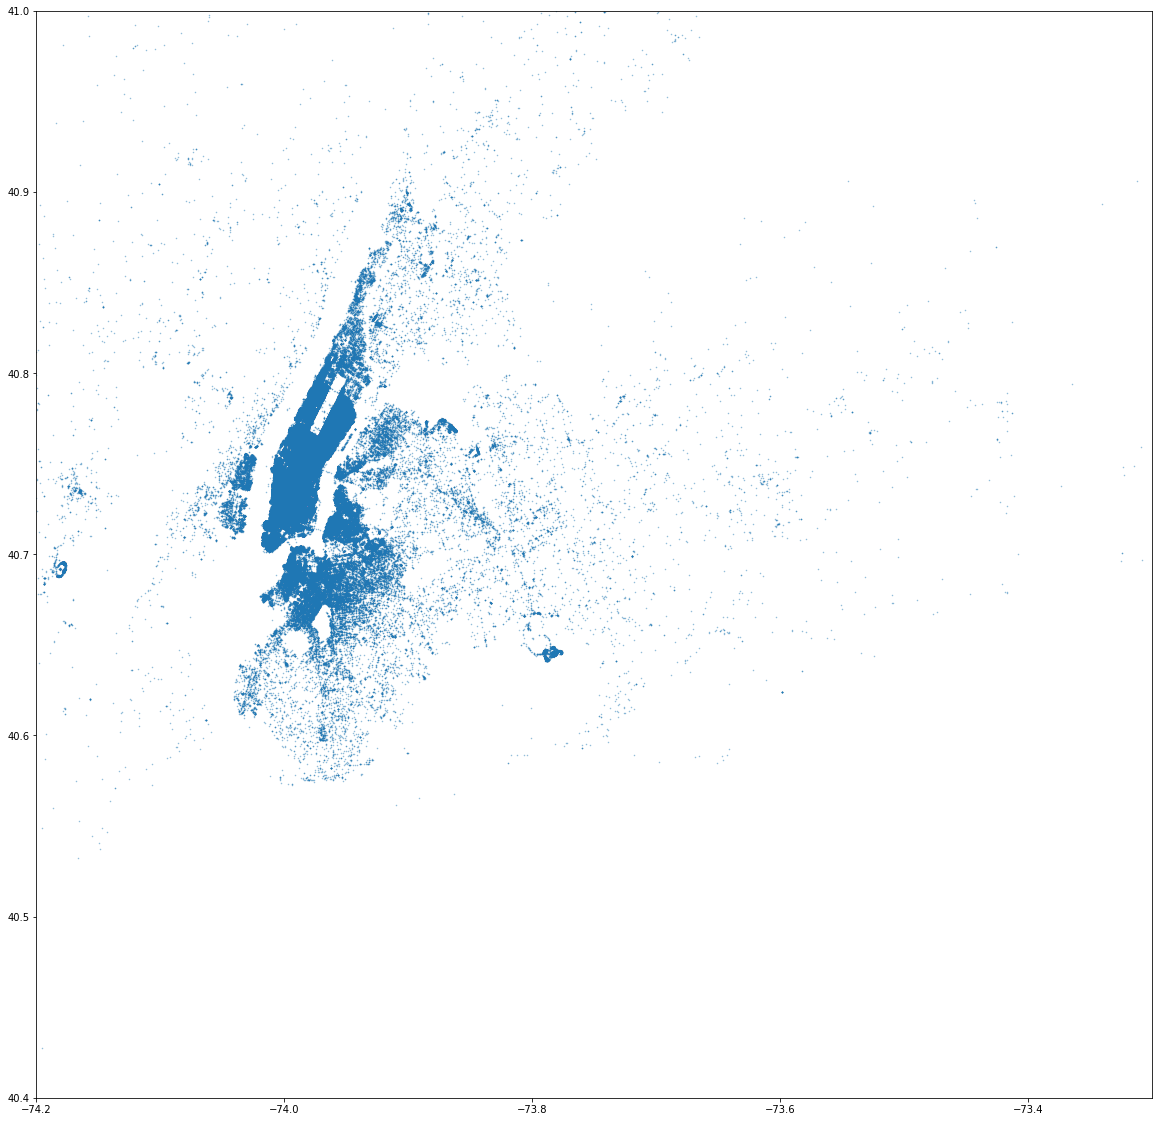

In [181]:
figure(figsize=(20,20))
plot (data['Lon'],data['Lat'], '.', ms=1,alpha=0.5)
xlim(-74.2,-73.3)
ylim(40.4,41)